In [79]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

In [80]:
# Read the data
df = pd.read_csv('seattle-weather.csv')

In [81]:
# Print the first 10 rows of the data
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [83]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [84]:
# Check missing values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [85]:
# Drop the date column and weather column
df.drop('date', axis=1, inplace=True)
df.drop('weather', axis=1, inplace=True)

In [86]:
# Get the most important features
df.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


<AxesSubplot: >

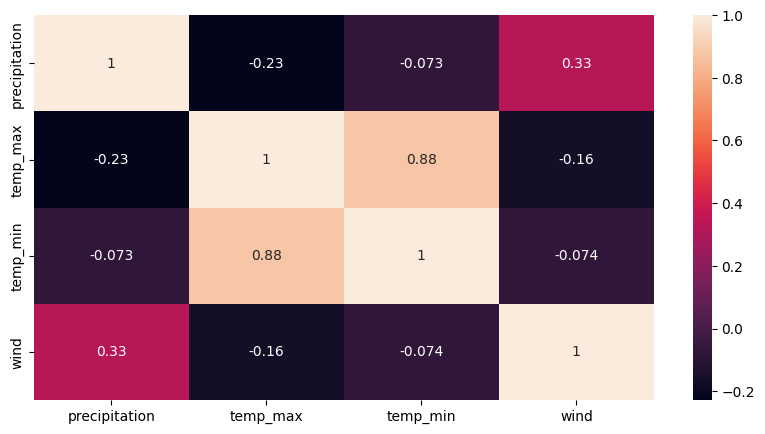

In [87]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [88]:
#drop the columns yang tidak dipakai
df.drop('temp_max', axis=1, inplace=True) #temp_max

In [89]:
# New Dataframe
df.head(5)

,precipitation,temp_min,wind
0,0.0,5.0,4.7
1,10.9,2.8,4.5
2,0.8,7.2,2.3
3,20.3,5.6,4.7
4,1.3,2.8,6.1


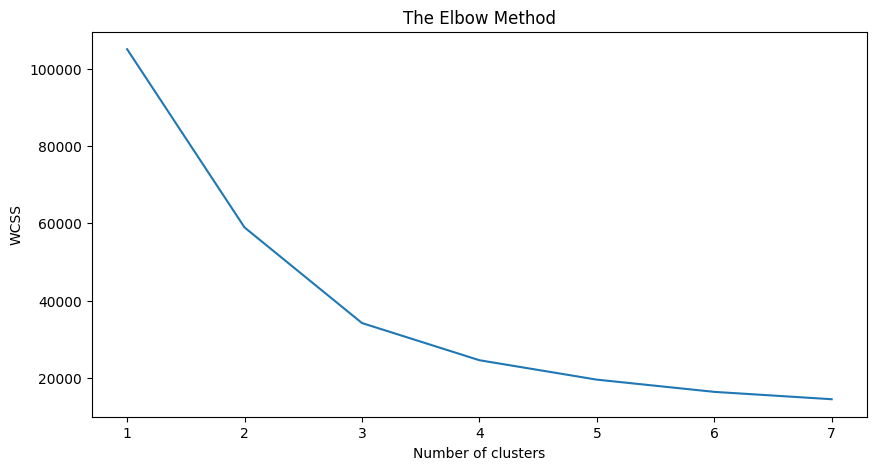

In [90]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Elbow method untuk mencari jumlah cluster yang optimal
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [91]:
# Melakukan Evaluasi Hasil Clustering
for k in range (1, 8):
  # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k, random_state=1)
  # Fitting input data
  kmeans = kmeans.fit(df)
  # Mendapatkan cluster labels
  labels = kmeans.predict(df)
  # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
  interia = kmeans.inertia_
  print ("k:",k, " cost:", interia)
print ("")

k: 1  cost: 105007.44579055443
k: 2  cost: 58902.838246081046
k: 3  cost: 34176.635591661216
k: 4  cost: 24556.95197005438
k: 5  cost: 19534.928382156966
k: 6  cost: 16374.766509071385
k: 7  cost: 14485.809848733328



In [92]:
# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

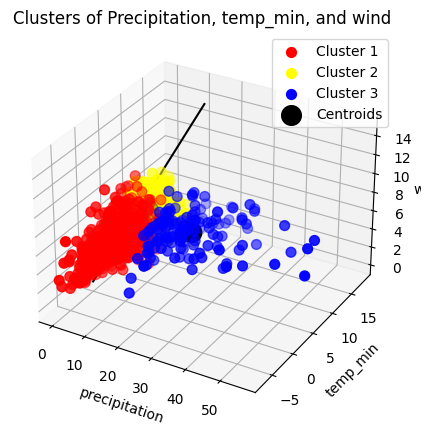

In [93]:
# Plot the clusters
kplot = plt.axes(projection='3d')
f1 = np.linspace(0, 15, 1000)
f2 = np.linspace(0, 15, 1000)
f3 = np.linspace(0, 15, 1000)

kplot.plot3D(f1, f2, f3, 'black')

kplot.scatter3D(df[y_kmeans == 0]['precipitation'], df[y_kmeans == 0]['temp_min'], df[y_kmeans == 0]['wind'], s=50, c='red', label='Cluster 1')
kplot.scatter3D(df[y_kmeans == 1]['precipitation'], df[y_kmeans == 1]['temp_min'], df[y_kmeans == 1]['wind'], s=50, c='yellow', label='Cluster 2')
kplot.scatter3D(df[y_kmeans == 2]['precipitation'], df[y_kmeans == 2]['temp_min'], df[y_kmeans == 2]['wind'], s=50, c='blue', label='Cluster 3')
kplot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=200, c='black', label='Centroids')
kplot.set_xlabel('precipitation')
kplot.set_ylabel('temp_min')
kplot.set_zlabel('wind')
plt.legend()
plt.title('Clusters of Precipitation, temp_min, and wind')
plt.show()

In [94]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [95]:
# Show the first 5 rows of the data
df.head(5)

,precipitation,temp_min,wind,Cluster
0,0.0,5.0,4.7,0
1,10.9,2.8,4.5,0
2,0.8,7.2,2.3,0
3,20.3,5.6,4.7,2
4,1.3,2.8,6.1,0


In [96]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [97]:
df['Cluster'].unique()

array([0, 2, 1])

In [98]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))